# SLS ER DIAGRAM

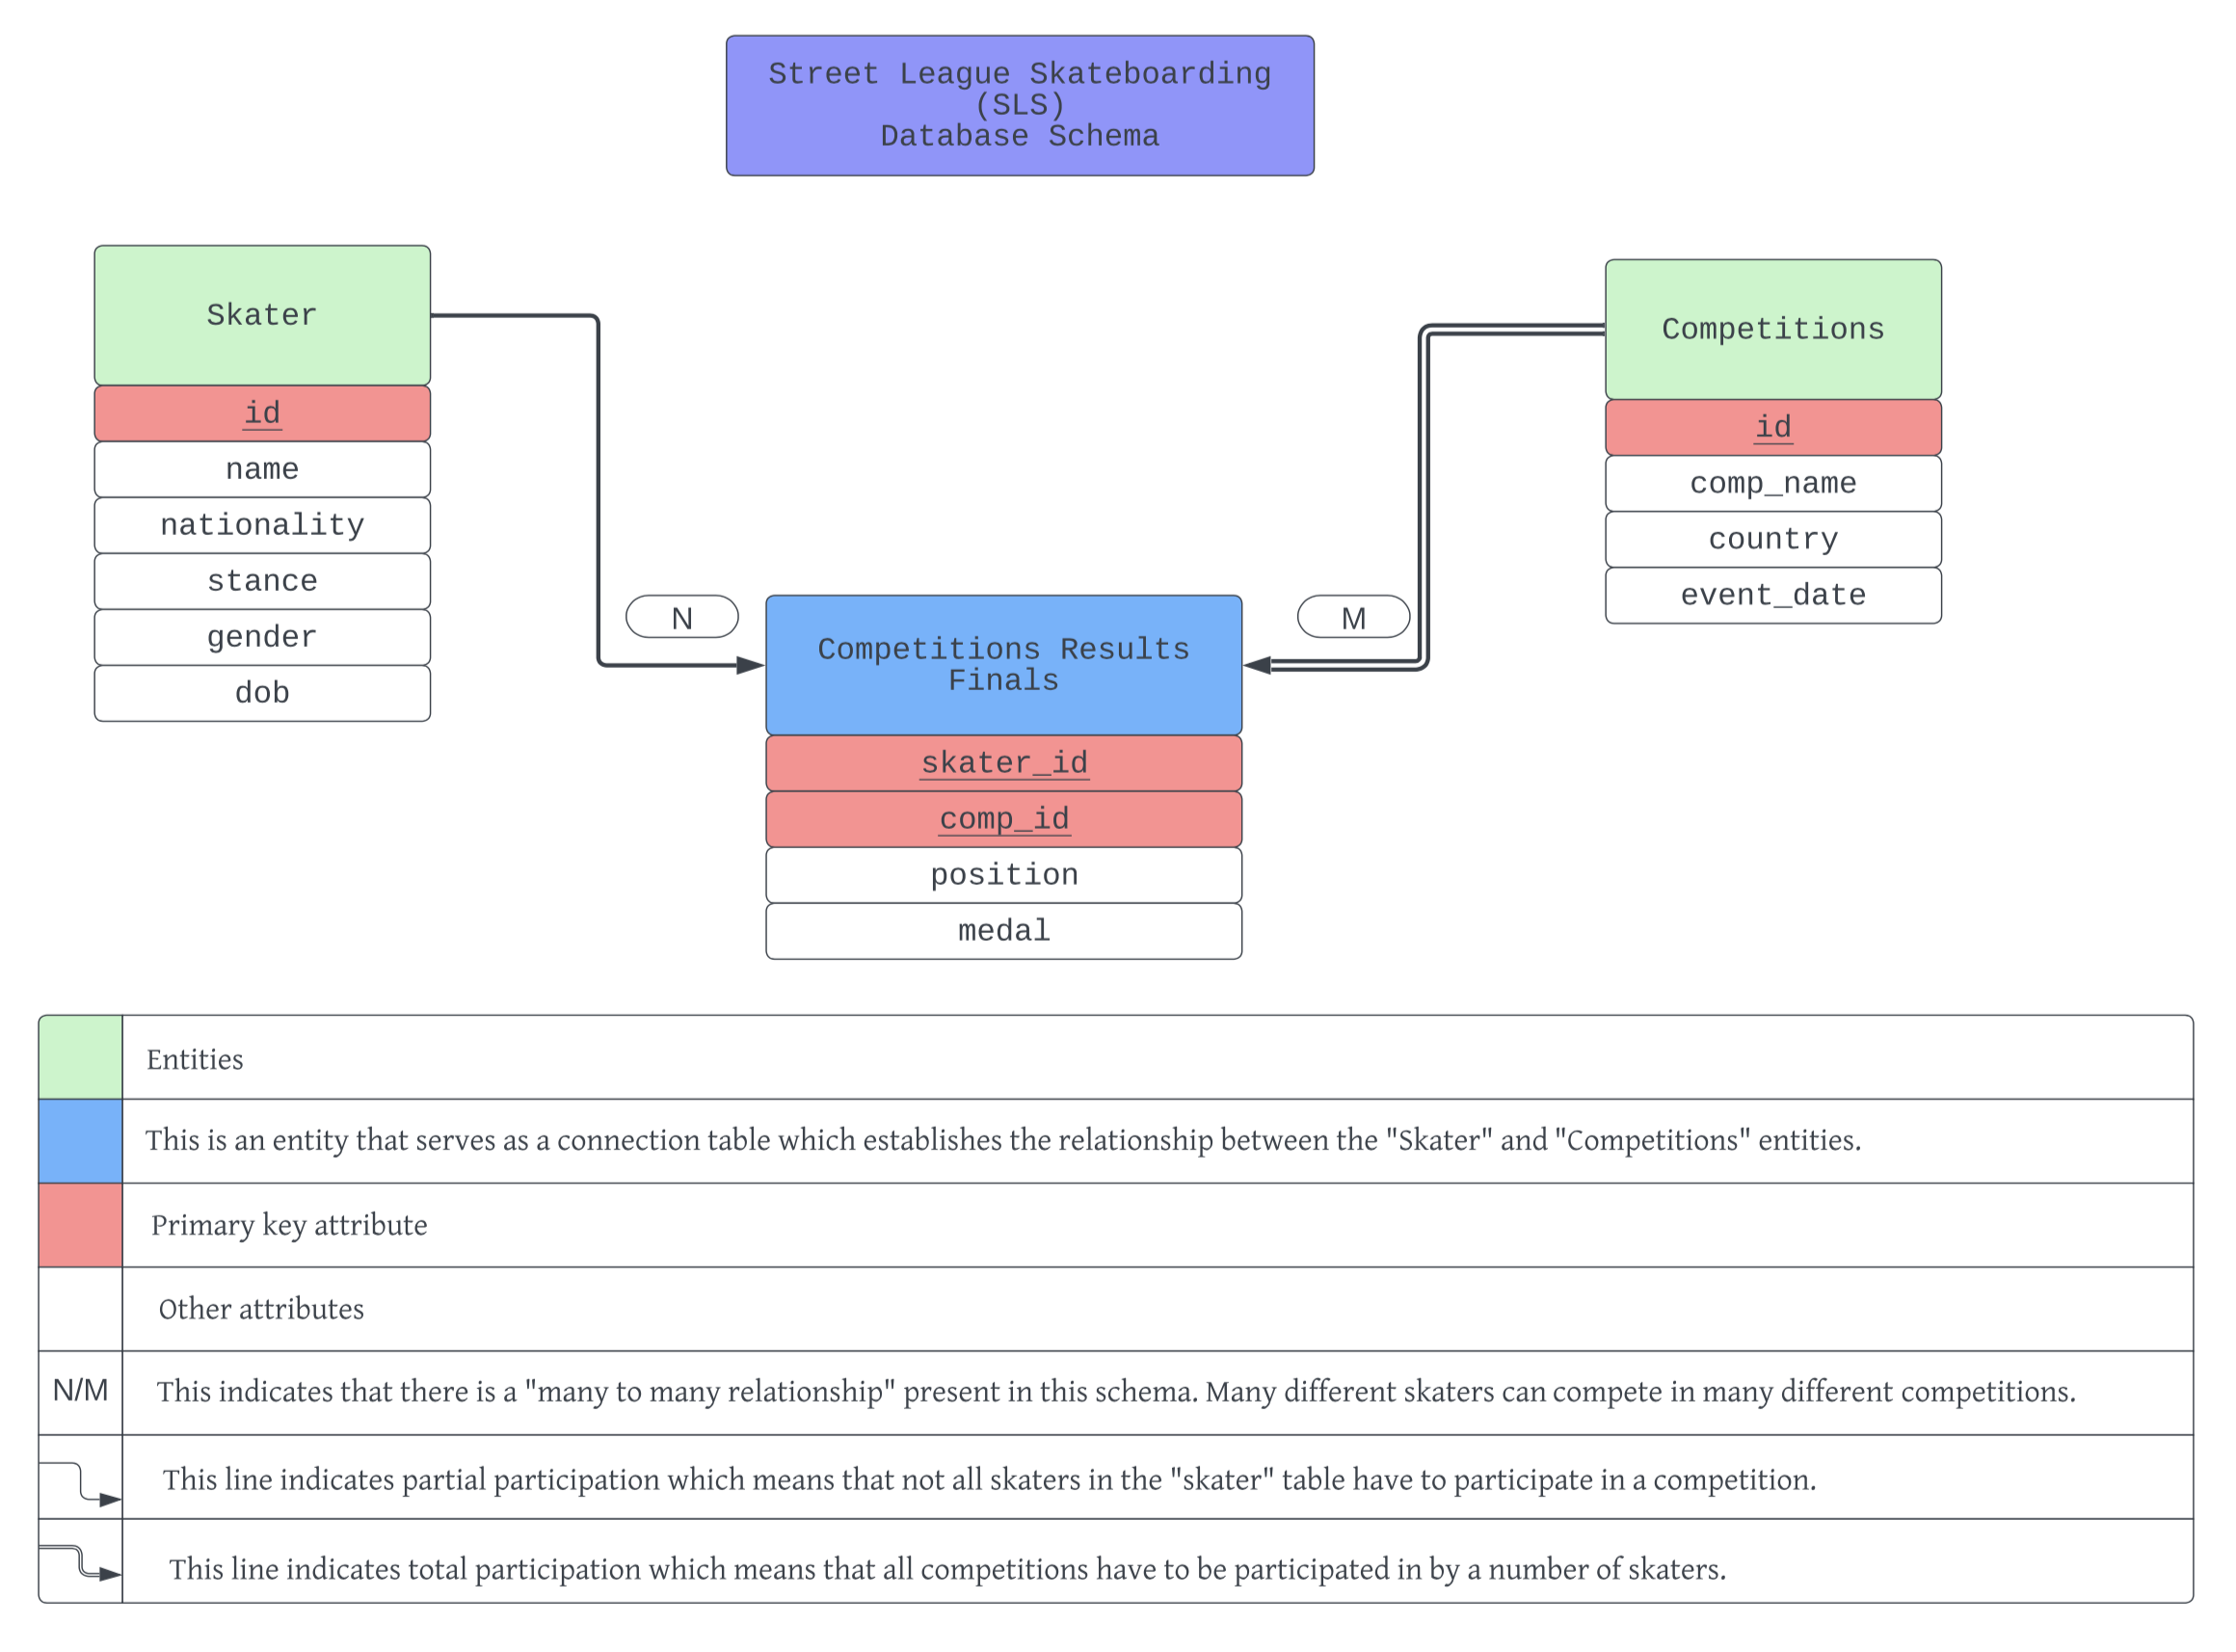

### Import Pandas and CSV files for SLS Database Queries

In [1]:
import pandas as pd
skaters = pd.read_csv('skaters.csv')
comps = pd.read_csv('comps.csv')
finals = pd.read_csv('comp_results_finals.csv')

In [2]:
skaters

,id,name,nationality,stance,gender,dob
0,1,Ryan Sheckler,United States,Regular,M,1989-12-30
1,2,Greg Lutzka,United States,Goofy,M,1985-04-20
2,3,Paul Rodriguez,United States,Goofy,M,1984-12-31
3,4,Shane O'Neill,Australia,Goofy,M,1990-01-30
4,5,Chaz Ortiz,United States,Regular,M,1994-05-04
...,...,...,...,...,...,...
78,79,Lucas Rabelo,Brazil,Goofy,M,1999-01-01
79,80,Poe Pinson,United States,Goofy,F,2005-03-02
80,81,Braden Hoban,United States,Regular,M,2001-01-01
81,82,Chloe Covell,Australia,Goofy,F,2010-02-08


In [3]:
comps.head()

,id,comp_name,country,event_date
0,1001,Las Vegas,United States,2010-09-25
1,1002,Ontario,United States,2010-09-11
2,1003,Glendale,United States,2010-08-28
3,1004,Newark,United States,2011-08-28
4,1005,Glendale,United States,2011-07-17


In [4]:
finals.head()

,skater_id,comp_id,position,medal
0,4,1001,1,Gold
1,7,1001,2,Silver
2,6,1001,3,Bronze
3,5,1001,4,none
4,1,1001,5,none


# THE QUERIES

### Which countries are represented in SLS finals and how many male and female skaters are there per country? 


In [5]:
skaters.columns

Index(['id', 'name', 'nationality', 'stance', 'gender', 'dob'], dtype='object')

In [6]:
new_skaters = skaters[['nationality', 'gender']]
new_skaters['count'] = 1
new_skaters

/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/3312877823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_skaters['count'] = 1


,nationality,gender,count
0,United States,M,1
1,United States,M,1
2,United States,M,1
3,Australia,M,1
4,United States,M,1
...,...,...,...
78,Brazil,M,1
79,United States,F,1
80,United States,M,1
81,Australia,F,1


In [7]:
nsgb = new_skaters.groupby(['nationality','gender'])['count'].sum()
viz = nsgb.reset_index()
viz

,nationality,gender,count
0,Argentina,M,1
1,Australia,F,2
2,Australia,M,2
3,Brazil,F,6
4,Brazil,M,9
5,Canada,M,3
6,China,F,1
7,Columbia,M,1
8,France,M,3
9,Japan,F,4


In [8]:
viz['nationality'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'Columbia',
       'France', 'Japan', 'Netherlands', 'Peru', 'Philippines',
       'Portugal', 'Puerto Rico', 'United States'], dtype=object)

In [9]:
countries = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'Columbia',
       'France', 'Japan', 'Netherlands', 'Peru', 'Philippines',
       'Portugal', 'Puerto Rico', 'United States']
male = [1,2,9,3,0,1,3,3,0,1,0,1,1,32]
female = [0,2,6,0,1,0,0,4,3,0,1,0,0,9]

In [10]:
import matplotlib.pyplot as plt
import numpy as np

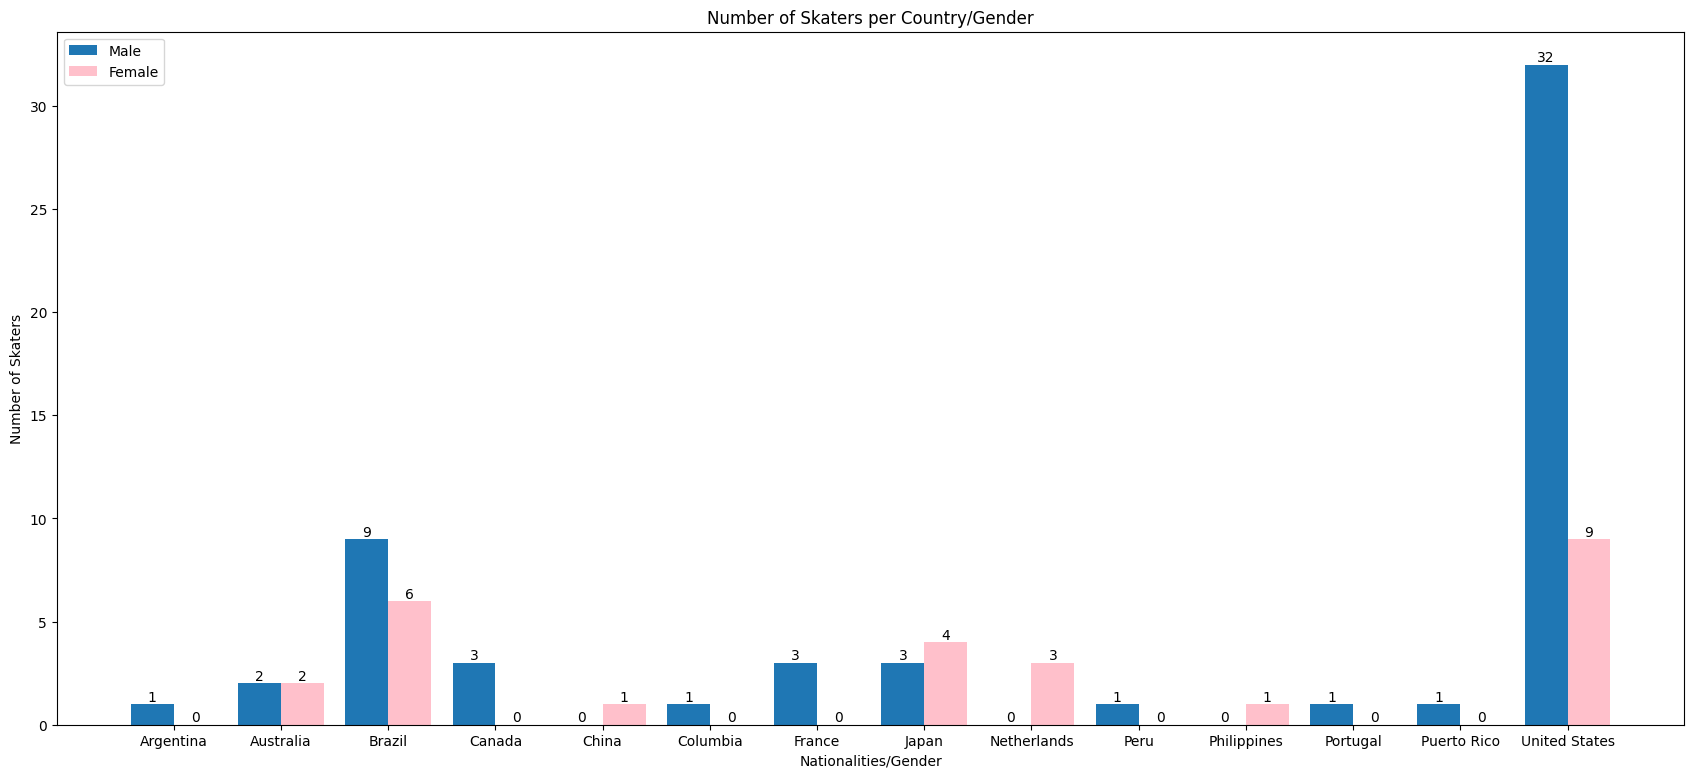

In [11]:
plt.figure(figsize=(21,9)) 
X_axis = np.arange(len(countries))
  
m = plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
y = plt.bar(X_axis + 0.2, female, 0.4, label = 'Female',color='pink')
 
plt.xticks(X_axis, countries)
plt.xlabel("Nationalities/Gender")
plt.ylabel("Number of Skaters")
plt.title("Number of Skaters per Country/Gender")

plt.legend(loc='upper left')
plt.bar_label(m,labels=male,label_type='edge')
plt.bar_label(y,labels=female,label_type='edge')
plt.show()

### What is the percentage ratio for regular vs goofy skaters?

In [12]:
skaters['count'] = 1
ratio = skaters.groupby('stance')['count'].sum()
r = ratio.reset_index()
r

,stance,count
0,Goofy,40
1,Regular,43


In [13]:
r['percentage'] = ((r['count']/r['count'].sum())*100).round()
r

,stance,count,percentage
0,Goofy,40,48.0
1,Regular,43,52.0


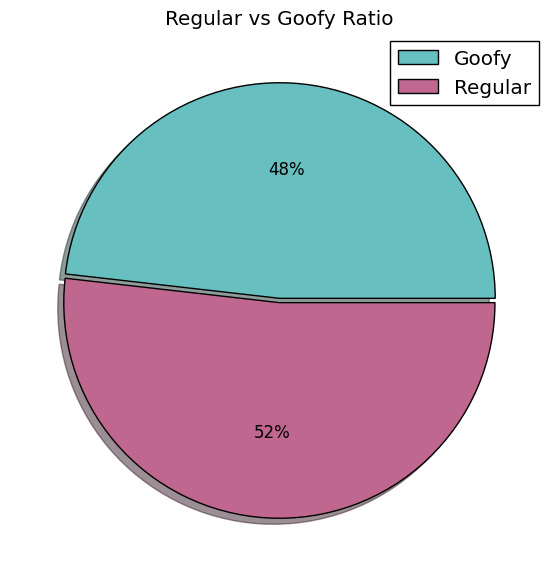

In [14]:
plt.figure(figsize=(7,7))
plt.style.use('classic')
slices = r['count']
colors = ['#67bfbf','#bf678f']
explode = [0.01,0.01]

plt.pie(slices,colors=colors,explode=explode,shadow=True,autopct='%1.0f%%',wedgeprops={'edgecolor':'black'})
plt.title('Regular vs Goofy Ratio')
plt.legend(r['stance'])
plt.show()

# JOINING THE TABLES

In [15]:
semijoined = pd.merge(skaters,finals,how='inner',left_on='id',right_on='skater_id')
joined = pd.merge(semijoined,comps,how='inner',left_on='comp_id',right_on='id')
joined

,id_x,name,nationality,stance,gender,dob,count,skater_id,comp_id,position,medal,id_y,comp_name,country,event_date
0,1,Ryan Sheckler,United States,Regular,M,1989-12-30,1,1,1001,5,none,1001,Las Vegas,United States,2010-09-25
1,2,Greg Lutzka,United States,Goofy,M,1985-04-20,1,2,1001,7,none,1001,Las Vegas,United States,2010-09-25
2,3,Paul Rodriguez,United States,Goofy,M,1984-12-31,1,3,1001,6,none,1001,Las Vegas,United States,2010-09-25
3,4,Shane O'Neill,Australia,Goofy,M,1990-01-30,1,4,1001,1,Gold,1001,Las Vegas,United States,2010-09-25
4,5,Chaz Ortiz,United States,Regular,M,1994-05-04,1,5,1001,4,none,1001,Las Vegas,United States,2010-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,77,Jagger Eaton,United States,Regular,M,2001-02-21,1,77,1047,5,none,1047,Las Vegas,United States,2022-10-09
485,78,Micky Papa,Canada,Regular,M,1990-08-31,1,78,1047,8,none,1047,Las Vegas,United States,2022-10-09
486,80,Poe Pinson,United States,Goofy,F,2005-03-02,1,80,1047,3,Bronze,1047,Las Vegas,United States,2022-10-09
487,81,Braden Hoban,United States,Regular,M,2001-01-01,1,81,1047,3,Bronze,1047,Las Vegas,United States,2022-10-09


# Who won the most medals per year per gender?

In [16]:
joined.columns

Index(['id_x', 'name', 'nationality', 'stance', 'gender', 'dob', 'count',
       'skater_id', 'comp_id', 'position', 'medal', 'id_y', 'comp_name',
       'country', 'event_date'],
      dtype='object')

In [17]:
all_data = joined[['name', 'nationality','gender', 'dob',
        'medal','event_date', 'count']]        
all_data

,name,nationality,gender,dob,medal,event_date,count
0,Ryan Sheckler,United States,M,1989-12-30,none,2010-09-25,1
1,Greg Lutzka,United States,M,1985-04-20,none,2010-09-25,1
2,Paul Rodriguez,United States,M,1984-12-31,none,2010-09-25,1
3,Shane O'Neill,Australia,M,1990-01-30,Gold,2010-09-25,1
4,Chaz Ortiz,United States,M,1994-05-04,none,2010-09-25,1
...,...,...,...,...,...,...,...
484,Jagger Eaton,United States,M,2001-02-21,none,2022-10-09,1
485,Micky Papa,Canada,M,1990-08-31,none,2022-10-09,1
486,Poe Pinson,United States,F,2005-03-02,Bronze,2022-10-09,1
487,Braden Hoban,United States,M,2001-01-01,Bronze,2022-10-09,1


In [18]:
data_needed = all_data[['name', 'gender', 'event_date',
        'medal','count']]
medal = data_needed.loc[all_data['medal']!= 'none']
medal

,name,gender,event_date,medal,count
3,Shane O'Neill,M,2010-09-25,Gold,1
5,Nyjah Huston,M,2010-09-25,Bronze,1
6,Chris Cole,M,2010-09-25,Silver,1
10,Chaz Ortiz,M,2010-09-11,Silver,1
11,Nyjah Huston,M,2010-09-11,Bronze,1
...,...,...,...,...,...
477,Gustavo Ribeiro,M,2022-10-09,Gold,1
479,Rayssa Leal,F,2022-10-09,Gold,1
486,Poe Pinson,F,2022-10-09,Bronze,1
487,Braden Hoban,M,2022-10-09,Bronze,1


In [19]:
medal['year'] = pd.DatetimeIndex(medal['event_date']).year
newmedal = medal[['year','name', 'gender',
        'medal','count']]
newmedal

/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/3990775612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal['year'] = pd.DatetimeIndex(medal['event_date']).year


,year,name,gender,medal,count
3,2010,Shane O'Neill,M,Gold,1
5,2010,Nyjah Huston,M,Bronze,1
6,2010,Chris Cole,M,Silver,1
10,2010,Chaz Ortiz,M,Silver,1
11,2010,Nyjah Huston,M,Bronze,1
...,...,...,...,...,...
477,2022,Gustavo Ribeiro,M,Gold,1
479,2022,Rayssa Leal,F,Gold,1
486,2022,Poe Pinson,F,Bronze,1
487,2022,Braden Hoban,M,Bronze,1


## Male Skaters: Highest medal value per year:
###### After doing some data exploration I found that assigning values to the different medals gave a more accurate representation of the data for this specific query seeing that some skaters earned the same amount of medals but of unequal value. 

In [20]:
m_medal = newmedal.loc[newmedal['gender']=='M']
m_medal

,year,name,gender,medal,count
3,2010,Shane O'Neill,M,Gold,1
5,2010,Nyjah Huston,M,Bronze,1
6,2010,Chris Cole,M,Silver,1
10,2010,Chaz Ortiz,M,Silver,1
11,2010,Nyjah Huston,M,Bronze,1
...,...,...,...,...,...
463,2018,Yuto Horigome,M,Gold,1
468,2018,Vincent Milou,M,Silver,1
475,2022,Chris Joslin,M,Silver,1
477,2022,Gustavo Ribeiro,M,Gold,1


#### After checking the values for the medals column I found that there was one row where 'Silver' was spelled 'Sliver' and thus had to change the spelling for that entry as seen below.

In [21]:
m_medal['medal'].value_counts()

Gold      49
Bronze    49
Silver    48
Sliver     1
Name: medal, dtype: int64

In [22]:
m_medal.loc[m_medal['medal'] == 'Sliver','medal'] = 'Silver'
m_medal.loc[m_medal['medal'] == 'Gold','medal'] = 3
m_medal.loc[m_medal['medal'] == 'Silver','medal'] = 2
m_medal.loc[m_medal['medal'] == 'Bronze','medal'] = 1
mvalue = m_medal.groupby(['year','name','medal']).sum().sort_values('year').reset_index()
mvalue

/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/410482974.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mvalue = m_medal.groupby(['year','name','medal']).sum().sort_values('year').reset_index()


,year,name,medal,count
0,2010,Chaz Ortiz,2,1
1,2010,Chris Cole,2,1
2,2010,Nyjah Huston,1,2
3,2010,Nyjah Huston,3,1
4,2010,Sean Malto,3,1
...,...,...,...,...
104,2022,Chris Joslin,2,1
105,2022,Gustavo Ribeiro,1,1
106,2022,Gustavo Ribeiro,3,2
107,2022,Sora Shirai,2,1


In [23]:
mvalue['medal_value'] = (mvalue['medal'] * mvalue['count'])
val = pd.DataFrame(mvalue)
val

,year,name,medal,count,medal_value
0,2010,Chaz Ortiz,2,1,2
1,2010,Chris Cole,2,1,2
2,2010,Nyjah Huston,1,2,2
3,2010,Nyjah Huston,3,1,3
4,2010,Sean Malto,3,1,3
...,...,...,...,...,...
104,2022,Chris Joslin,2,1,2
105,2022,Gustavo Ribeiro,1,1,1
106,2022,Gustavo Ribeiro,3,2,6
107,2022,Sora Shirai,2,1,2


In [24]:

mmgb = val.groupby(['year','name']).sum().sort_values(['year','medal_value'],ascending=[True,False])
v = mmgb.reset_index()
v

,year,name,medal,count,medal_value
0,2010,Nyjah Huston,4,3,5
1,2010,Shane O'Neill,5,2,5
2,2010,Sean Malto,3,1,3
3,2010,Chaz Ortiz,2,1,2
4,2010,Chris Cole,2,1,2
...,...,...,...,...,...
80,2022,Yuto Horigome,3,2,6
81,2022,Chris Joslin,3,3,4
82,2022,Braden Hoban,3,2,3
83,2022,Sora Shirai,2,1,2


In [25]:
male_most = v.drop_duplicates(subset='year')
male_most[['year','name']]

,year,name
0,2010,Nyjah Huston
6,2011,Nyjah Huston
12,2012,Nyjah Huston
19,2013,Nyjah Huston
26,2014,Nyjah Huston
33,2015,Nyjah Huston
39,2016,Nyjah Huston
46,2017,Nyjah Huston
53,2018,Yuto Horigome
58,2019,Nyjah Huston


## Female Skaters: Highest medal value per year:
###### After doing some data exploration I found that assigning values to the different medals gave a more accurate representation of the data for this specific query seeing that some skaters earned the same amount of medals but of unequal value. 

In [26]:
f_medal = newmedal.loc[newmedal['gender']=='F']
f_medal.head()

,year,name,gender,medal,count
165,2015,Leticia Bufoni,F,Gold,1
166,2015,Vanessa Torres,F,Silver,1
167,2015,Alana Smith,F,Bronze,1
269,2019,Pamela Rosa,F,Gold,1
274,2019,Hayley Wilson,F,Silver,1


In [27]:
f_medal.loc[f_medal['medal'] == 'Gold','medal'] = 3
f_medal.loc[f_medal['medal'] == 'Silver','medal'] = 2
f_medal.loc[f_medal['medal'] == 'Bronze','medal'] = 1
fvalue = f_medal.groupby(['year','name','medal']).sum().sort_values('year').reset_index()
fvalue.head()

/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/3015523828.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fvalue = f_medal.groupby(['year','name','medal']).sum().sort_values('year').reset_index()


,year,name,medal,count
0,2015,Alana Smith,1,1
1,2015,Leticia Bufoni,3,1
2,2015,Vanessa Torres,2,1
3,2018,Jenn Soto,3,1
4,2018,Lacey Baker,2,1


In [28]:
fvalue['medal_value'] = (fvalue['medal'] * fvalue['count'])
fval = pd.DataFrame(fvalue)
fval.head()

,year,name,medal,count,medal_value
0,2015,Alana Smith,1,1,1
1,2015,Leticia Bufoni,3,1,3
2,2015,Vanessa Torres,2,1,2
3,2018,Jenn Soto,3,1,3
4,2018,Lacey Baker,2,1,2


In [29]:

fmgb = fval.groupby(['year','name']).sum('medal_value').sort_values(['year','medal_value'],ascending=[True,False])
fv = fmgb.reset_index()
fv.head()

,year,name,medal,count,medal_value
0,2015,Leticia Bufoni,3,1,3
1,2015,Vanessa Torres,2,1,2
2,2015,Alana Smith,1,1,1
3,2018,Jenn Soto,3,1,3
4,2018,Lacey Baker,2,1,2


In [30]:
female_most = fv.drop_duplicates(subset='year')
female_most[['year','name']]

,year,name
0,2015,Leticia Bufoni
3,2018,Jenn Soto
6,2019,Pamela Rosa
13,2021,Rayssa Leal
18,2022,Rayssa Leal


## Who was the youngest and oldest skater to ever participate in an SLS Final?
###### For the below calculation I had to create two columns. One for 'age' and one for 'days old'. This helped with the accurancy of determining the oldest skater by the amount of days.

In [31]:
data = joined[['name','gender', 'dob','event_date']]
data

,name,gender,dob,event_date
0,Ryan Sheckler,M,1989-12-30,2010-09-25
1,Greg Lutzka,M,1985-04-20,2010-09-25
2,Paul Rodriguez,M,1984-12-31,2010-09-25
3,Shane O'Neill,M,1990-01-30,2010-09-25
4,Chaz Ortiz,M,1994-05-04,2010-09-25
...,...,...,...,...
484,Jagger Eaton,M,2001-02-21,2022-10-09
485,Micky Papa,M,1990-08-31,2022-10-09
486,Poe Pinson,F,2005-03-02,2022-10-09
487,Braden Hoban,M,2001-01-01,2022-10-09


### YOUNGEST

In [32]:
import datetime
data['days_old'] = ((pd.to_datetime(data['event_date'])).dt.date)-((pd.to_datetime(data['dob'])).dt.date)
data['age'] = ((pd.to_datetime(data['event_date'])).dt.year)-((pd.to_datetime(data['dob'])).dt.year)
youngest = data[['name','age','days_old']].sort_values('days_old').head(1)
youngest

/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/1898527075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_old'] = ((pd.to_datetime(data['event_date'])).dt.date)-((pd.to_datetime(data['dob'])).dt.date)
/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/1898527075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = ((pd.to_datetime(data['event_date'])).dt.year)-((pd.to_datetime(data['dob'])).dt.year)


,name,age,days_old
275,Rayssa Leal,11,4160 days


### OLDEST

In [33]:
oldest = data[['name','age','days_old']].sort_values('days_old',ascending=False).head(1)
oldest

,name,age,days_old
431,Ryan Decenzo,36,13258 days


# Youngest and oldest skater to ever win a gold medal

## Youngest Gold

In [34]:
yodata = joined[['name','dob','event_date','medal']]
yo = yodata.loc[yodata['medal']=='Gold']
yo['days_old'] = ((pd.to_datetime(yo['event_date'])).dt.date)-((pd.to_datetime(yo['dob'])).dt.date)
yo['age'] = ((pd.to_datetime(yo['event_date'])).dt.year)-((pd.to_datetime(yo['dob'])).dt.year)
y = yo[['name','age','days_old','medal']].sort_values('days_old').head(1)
y

/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/2172285342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yo['days_old'] = ((pd.to_datetime(yo['event_date'])).dt.date)-((pd.to_datetime(yo['dob'])).dt.date)
/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/2172285342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yo['age'] = ((pd.to_datetime(yo['event_date'])).dt.year)-((pd.to_datetime(yo['dob'])).dt.year)


,name,age,days_old,medal
362,Rayssa Leal,11,4224 days,Gold


## Oldest Gold

In [35]:
o = yo[['name','age','days_old','medal']].sort_values('days_old',ascending=False).head(1)
o

,name,age,days_old,medal
197,Paul Rodriguez,32,11506 days,Gold


# Compare the average age of male vs female skaters

In [36]:
avecalc = data[['name','gender','age']]
ave_age = avecalc.groupby('gender').mean().round(2)
ave_age

/var/folders/ng/_1df0q4n5v38j1nblnt_zhtm0000gn/T/ipykernel_42663/1208753336.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ave_age = avecalc.groupby('gender').mean().round(2)


,age
gender,
F,20.32
M,24.54


In [37]:
pop = data[['gender','age']]
mpop = pop.loc[pop['gender']=='M']
mpop = mpop.sort_values('age')
mp = mpop.groupby('age').count().reset_index()
mp

,age,gender
0,15,1
1,16,7
2,17,8
3,18,13
4,19,11
5,20,23
6,21,39
7,22,28
8,23,45
9,24,29


In [38]:
fpop = pop.loc[pop['gender']=='F']
fpop = fpop.sort_values('age')
fp = fpop.groupby('age').count().reset_index()
fp

,age,gender
0,11,3
1,12,1
2,13,6
3,14,8
4,15,5
5,16,8
6,17,11
7,18,6
8,19,3
9,20,5


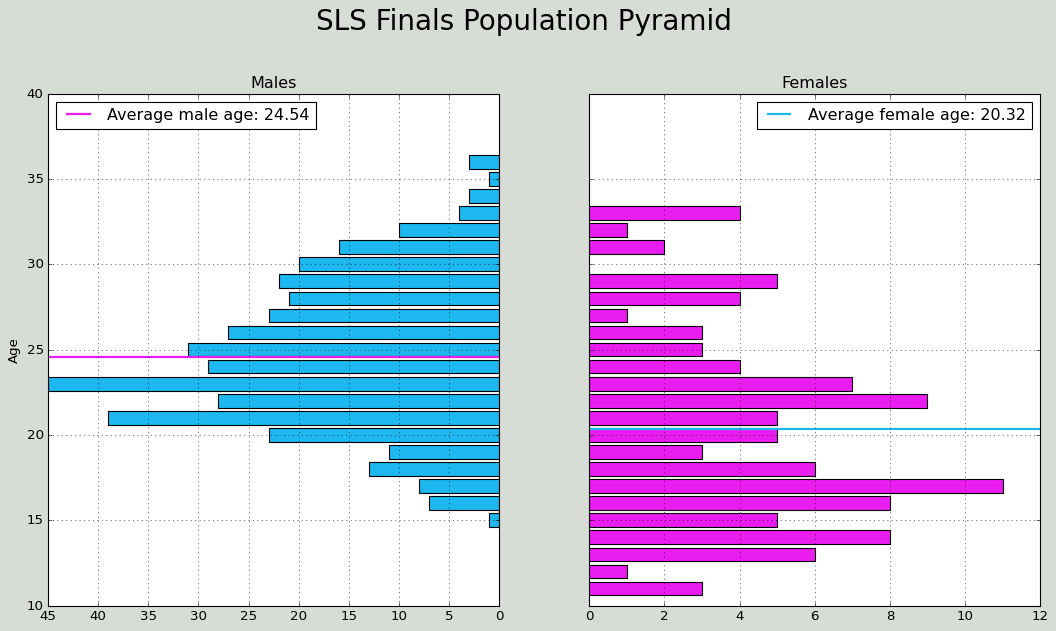

In [39]:
a = mp['gender']
b = fp['gender']
y_male = mp['age']
y_female = fp['age']


fig, axes = plt.subplots(ncols=2,sharey=True, figsize=(16,8))


fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,1,"SLS Finals Population Pyramid ", fontsize=25, ha='center')
    

axes[0].barh(y_male,a, align='center', color='#1cb8ef')
axes[0].set(title='Males')
axes[1].barh(y_female,b, align='center', color='#ea1df0')
axes[1].set(title='Females')


axes[1].grid()
axes[0].set(ylabel='Age')
axes[1].set(yticks=[10,15,20,25,30,35,40])
axes[0].axhline(24.54,color='#ea1df0',label='Average male age: 24.54',linewidth=2)
axes[1].axhline(20.32,color='#1cb8ef',label='Average female age: 20.32',linewidth=2)
axes[0].invert_xaxis()
axes[0].grid()
axes[0].legend(loc='upper left')
axes[1].legend()

plt.show()

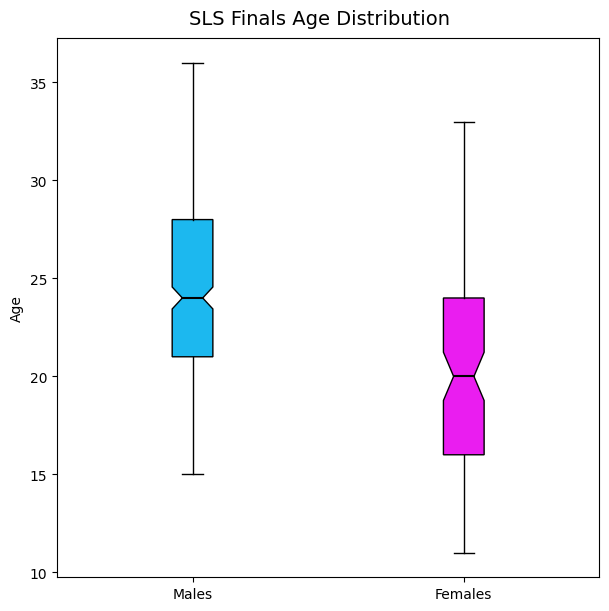

In [40]:
mbox = avecalc.loc[avecalc['gender']=='M']
fbox = avecalc.loc[avecalc['gender']=='F']
male_box = mbox['age']
female_box = fbox['age']

### BOX PLOT ###

plt.style.use('default')
plt.figure(figsize=(7,7))
boxes = plt.boxplot([male_box,female_box],notch=True,labels=['Males','Females']
                    ,patch_artist=True,medianprops=dict(color='k',linewidth=1.5))
boxes['boxes'][1].set_facecolor('#ea1df0')
boxes['boxes'][0].set_facecolor('#1cb8ef')
plt.figtext(.5,.9,'SLS Finals Age Distribution',fontsize=14,ha='center')
plt.ylabel('Age')
plt.show()

# Conversion rate: Finals made vs Top 3 made

In [41]:
conv_data = all_data[['name','gender','count','medal']]
conv_data.head()

,name,gender,count,medal
0,Ryan Sheckler,M,1,none
1,Greg Lutzka,M,1,none
2,Paul Rodriguez,M,1,none
3,Shane O'Neill,M,1,Gold
4,Chaz Ortiz,M,1,none


## Male Conversion and Visualisation

In [42]:
conv_data.loc[conv_data['medal'] == 'Gold','medal'] = 1
conv_data.loc[conv_data['medal'] == 'Silver','medal'] = 1
conv_data.loc[conv_data['medal'] == 'Sliver','medal'] = 1
conv_data.loc[conv_data['medal'] == 'Bronze','medal'] = 1
conv_data.loc[conv_data['medal'] == 'none','medal'] = 0
mcon = conv_data.loc[conv_data['gender']=='M']
mdf = mcon.groupby('name').count().reset_index()
mdf2 = mcon.groupby('name')['medal'].sum().reset_index()
mconjoin = pd.merge(mdf,mdf2,how='inner',left_on='name',right_on='name')
mcj = mconjoin[['name','count','medal_y']]
mcj = mcj.rename(columns={'count':'in_finals','medal_y':'in_top_3'})
mcj['conv_rate'] = ((mcj['in_top_3']/mcj['in_finals'])*100).astype(int)
mcj.sort_values('in_finals',ascending=False)

,name,in_finals,in_top_3,conv_rate
38,Nyjah Huston,42,34,80
44,Shane O'Neill,26,9,34
39,Paul Rodriguez,26,8,30
27,Luan Oliveira,23,9,39
8,Chris Cole,21,11,52
51,Torey Pudwill,18,5,27
7,Chaz Ortiz,18,8,44
25,Kelvin Hoefler,16,7,43
43,Sean Malto,15,4,26
9,Chris Joslin,13,6,46


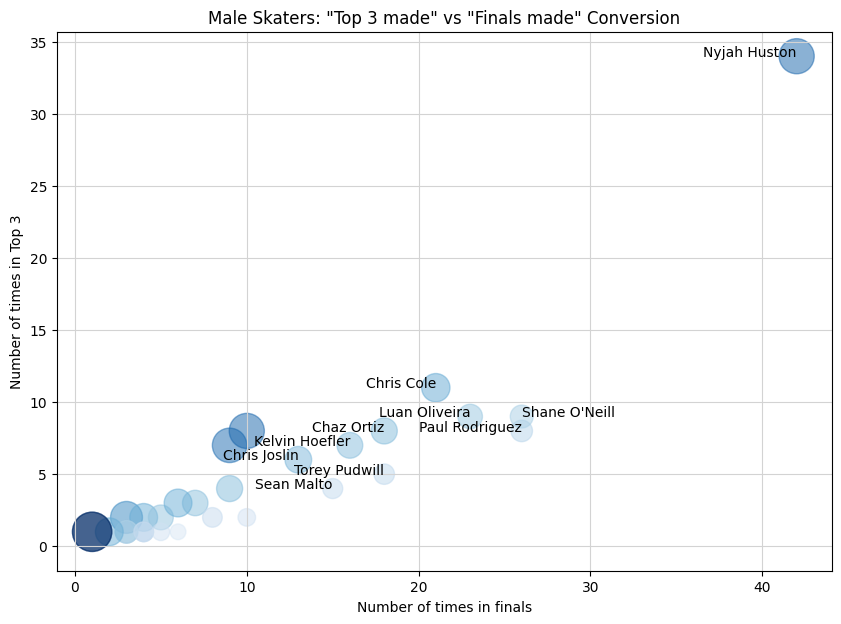

In [43]:
it3 = mcj['in_top_3']
inf = mcj['in_finals']
size = mcj['conv_rate']
plt.figure(figsize=(10,7))
plt.scatter(inf,it3,s=size*8,c=mcj.conv_rate,cmap='Blues',alpha=0.5)
plt.text(42,34,'Nyjah Huston',ha='right')
plt.text(26,9,"Shane O'Neill",ha='left')
plt.text(26,8,'Paul Rodriguez',ha='right')
plt.text(23,9,'Luan Oliveira',ha='right')
plt.text(21,11,'Chris Cole',ha='right')
plt.text(18,5,'Torey Pudwill',ha='right')
plt.text(18,8,'Chaz Ortiz',ha='right')
plt.text(16,7,'Kelvin Hoefler',ha='right')
plt.text(15,4,'Sean Malto',ha='right')
plt.text(13,6,'Chris Joslin',ha='right')
plt.xlabel('Number of times in finals')
plt.ylabel('Number of times in Top 3')
plt.grid(color='lightgray')
plt.title('Male Skaters: "Top 3 made" vs "Finals made" Conversion')
plt.show()

## Female Conversion and Visualisation

In [44]:
fcon = conv_data.loc[conv_data['gender']=='F']
fdf = fcon.groupby('name').count().reset_index()
fdf2 = fcon.groupby('name')['medal'].sum().reset_index()
fconjoin = pd.merge(fdf,fdf2,how='inner',left_on='name',right_on='name')
fcj = fconjoin[['name','count','medal_y']]
fcj = fcj.rename(columns={'count':'in_finals','medal_y':'in_top_3'})
fcj['conv_rate'] = ((fcj['in_top_3']/fcj['in_finals'])*100).astype(int)
fcj.sort_values('in_finals',ascending=False)

,name,in_finals,in_top_3,conv_rate
17,Pamela Rosa,13,6,46
19,Rayssa Leal,10,10,100
16,Momiji Nishiya,7,4,57
5,Funa Nakayama,7,3,42
25,Yumeka Oda,6,1,16
1,Alexis Sablone,6,0,0
2,Aori Nishimura,5,2,40
3,Candy Jacobs,5,0,0
6,Gabriela Mazetto,5,0,0
20,Roos Zwetsloot,5,1,20


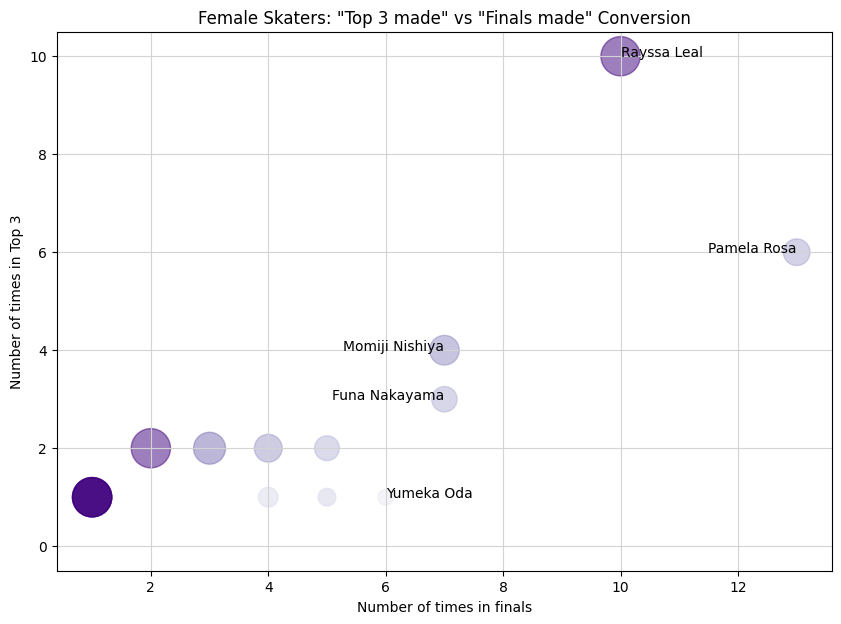

In [45]:
fit3 = fcj['in_top_3']
finf = fcj['in_finals']
size = fcj['conv_rate']
plt.figure(figsize=(10,7))
plt.scatter(finf,fit3,s=size*8,c=fcj.conv_rate,cmap='Purples',alpha=0.5)
plt.text(13,6,'Pamela Rosa',ha='right')
plt.text(10,10,"Rayssa Leal",ha='left')
plt.text(7,4,'Momiji Nishiya',ha='right')
plt.text(7,3,'Funa Nakayama',ha='right')
plt.text(6,1,'Yumeka Oda',ha='left')
plt.xlabel('Number of times in finals')
plt.ylabel('Number of times in Top 3')
plt.grid(color='lightgray')
plt.title('Female Skaters: "Top 3 made" vs "Finals made" Conversion')
plt.show()